In [ ]:
!pip install kaggle
#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick
!pip install requests

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download borapajo/food-choices

food-choices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip food-choices.zip

Archive:  food-choices.zip
replace codebook_food.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: codebook_food.docx      
  inflating: food_coded.csv          


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import requests
import json

In [ ]:
df = pd.read_csv("food_coded.csv", usecols=["cook","eating_out","employment","ethnic_food","exercise","fruit_day","income","on_off_campus","pay_meal_out","sports","veggies_day"])

In [ ]:
df

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
95,3.0,2,2.0,4,2.0,5,3.0,3.0,4,2.0,5
96,2.0,2,2.0,5,2.0,5,2.0,1.0,3,1.0,5
97,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
98,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4


<Axes: >

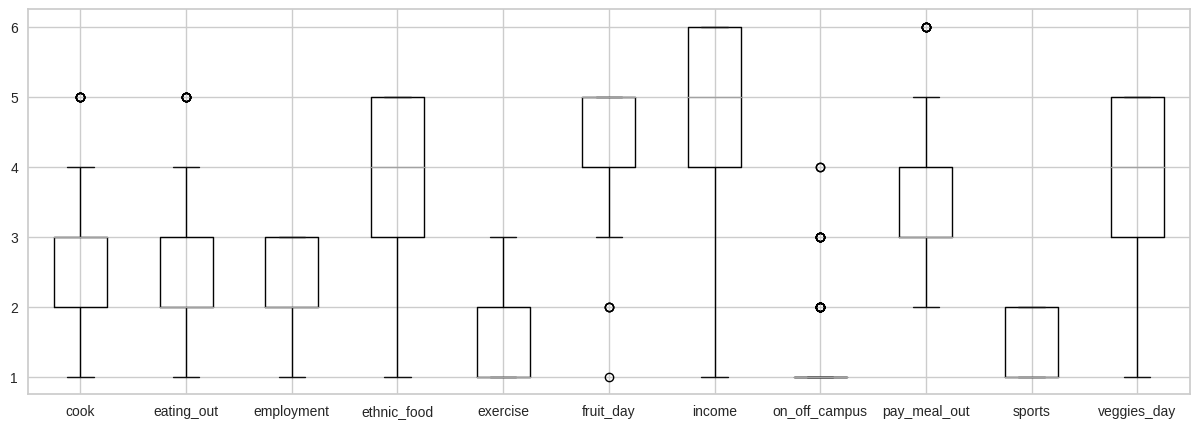

In [ ]:
df.boxplot(figsize=(15,5))

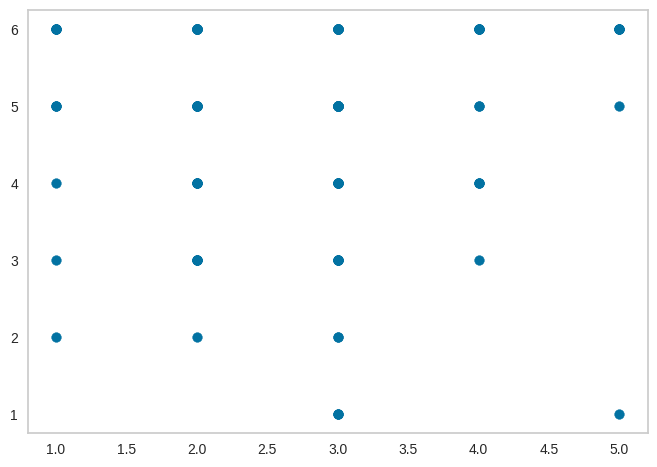

In [ ]:
income = np.array(list(df["income"]))
cook = np.array(list(df["cook"]))
plt.grid()
plt.scatter(cook,income)

In [ ]:
data = np.vstack((cook,income)).T
inertias = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init=10,init="k-means++",max_iter=1000)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

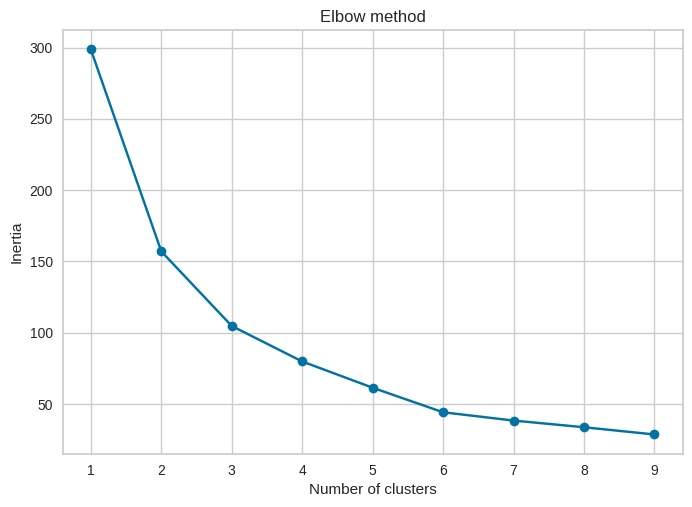

In [ ]:
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#no clear elbow point

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

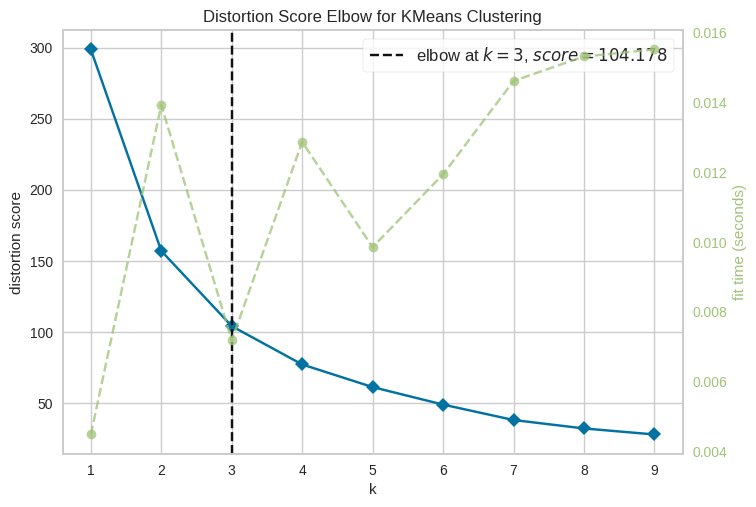

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(n_init=10, init="k-means++",max_iter=1000)
visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

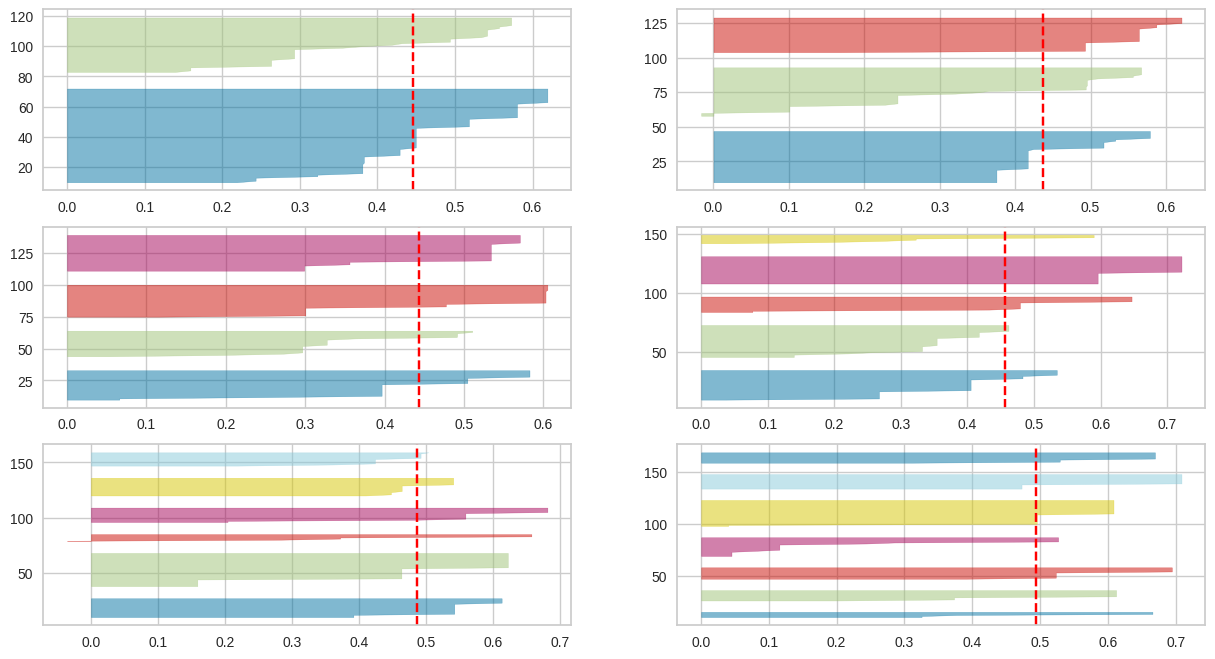

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6 ,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10,init="k-means++", max_iter=1000)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10,init="k-means++", max_iter=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


InterclusterDistance(ax=<Axes: >,
                     estimator=KMeans(max_iter=1000, n_clusters=3, n_init=10))

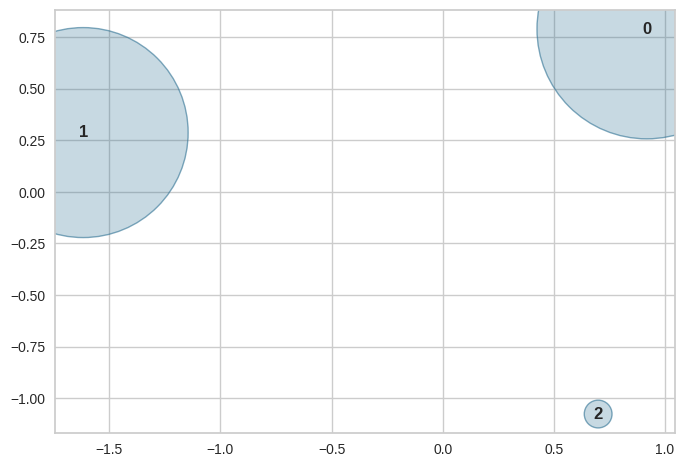

In [ ]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(kmeans)

visualizer.fit(data)

[[2.75       3.08333333]
 [1.65384615 5.53846154]
 [3.52631579 5.55263158]]


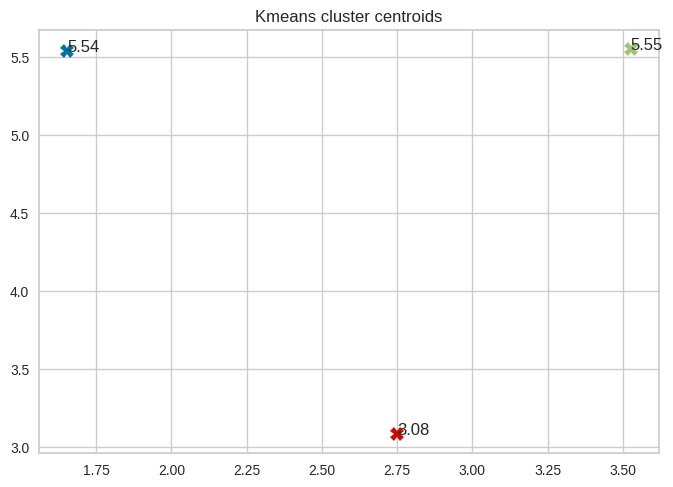

In [ ]:
kmeans.fit(data)
colors = ['r','b','g','c','y']
centroids = kmeans.cluster_centers_
print(centroids)
for n in range(len(centroids)):
  plt.plot(centroids[n][0], centroids[n][1], marker='X', color=colors[n], markersize=10)
  plt.annotate(round(float(centroids[n][1]),2),xy=(centroids[n][0],centroids[n][1]))
plt.title('Kmeans cluster centroids')
plt.show()

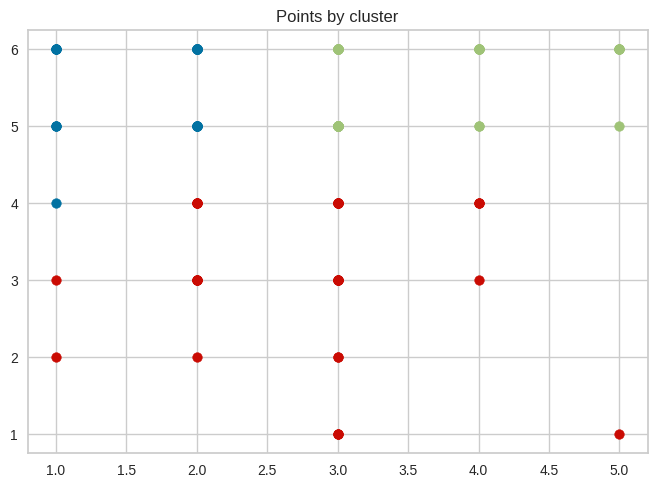

In [ ]:
z = kmeans.predict(data)
scatter_colors = []
for n in range(len(data)):
  scatter_colors.append(colors[z[n]])

for n in range(len(data)):
    # Filter data points to plot each in turn.
    ys = income
    xs = cook
    plt.scatter(data[n][0], data[n][1], color=scatter_colors[n])

plt.title("Points by cluster")
plt.show()

In [ ]:
#foursquare
API_KEY = open("foursquare.txt","r").read()

In [ ]:
latitude = 23.170100
longitude = 79.957000
latlong = requests.utils.quote(f'{latitude},{longitude}')
radius = requests.utils.quote(str(30000))
limit = requests.utils.quote(str(50))
sortBy = requests.utils.quote("POPULARITY")

url = f'https://api.foursquare.com/v3/places/search?ll={latlong}&radius={radius}&sort={sortBy}&limit={limit}'
headers = {
    "Accept": "application/json",
    "Authorization": str(API_KEY)
}


response = requests.get(url, headers=headers)

print(response.text)

{"results":[{"fsq_id":"4e7ee35cb8f79cb041b05fa5","categories":[{"id":17054,"name":"Flea Market","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/fleamarket_","suffix":".png"}}],"chains":[],"distance":3380,"geocodes":{"main":{"latitude":23.153629,"longitude":79.929167}},"link":"/v3/places/4e7ee35cb8f79cb041b05fa5","location":{"address":"After Gorakhpur Narrow Gauge Crossing","country":"IN","formatted_address":"After Gorakhpur Narrow Gauge Crossing, Jabalpur, Madhya Pradesh","locality":"Jabalpur","region":"Madhya Pradesh"},"name":"Gorakhpur Bazaar","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"509bb00ce4b0a4918889d9f3","categories":[{"id":18000,"name":"Sports and Recreation","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_","suffix":".png"}}],"chains":[],"distance":7573,"geocodes":{"drop_off":{"latitude":23.106576,"longitude":79.925517},"main":{"latitude":23.106568,"longitude":79.925766}},"link":"/v3/places/509bb00ce4b0a4918889d9f3

In [ ]:
apiResponse = response.text

In [ ]:
apiJson = json.loads(apiResponse)
venues = apiJson["results"]
for i in venues:
  if(i['categories'] and i['categories'][0]):
    i['categories'] = i['categories'][0]
nearby_venues = pd.json_normalize(venues)
nearby_venues

,fsq_id,chains,distance,link,name,timezone,categories.id,categories.name,categories.icon.prefix,categories.icon.suffix,...,geocodes.drop_off.longitude,location.cross_street,location.postcode,geocodes.roof.latitude,geocodes.roof.longitude,related_places.children,categories,related_places.parent.fsq_id,related_places.parent.name,location.address_extended
0,4e7ee35cb8f79cb041b05fa5,[],3380,/v3/places/4e7ee35cb8f79cb041b05fa5,Gorakhpur Bazaar,Asia/Kolkata,17054.0,Flea Market,https://ss3.4sqi.net/img/categories_v2/shops/f...,.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,509bb00ce4b0a4918889d9f3,[],7573,/v3/places/509bb00ce4b0a4918889d9f3,Narmada River Gwari Ghat,Asia/Kolkata,18000.0,Sports and Recreation,https://ss3.4sqi.net/img/categories_v2/shops/s...,.png,...,79.925517,,482008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e0ad0b763651cdae72c8dde,[],2031,/v3/places/4e0ad0b763651cdae72c8dde,Sadar Bazaar,Asia/Kolkata,12009.0,Education,https://ss3.4sqi.net/img/categories_v2/buildin...,.png,...,NaN,main road,482002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4ffc3b4fe4b095dbe1d822f0,[],2618,/v3/places/4ffc3b4fe4b095dbe1d822f0,Indian Coffee House,Asia/Kolkata,13032.0,"Cafe, Coffee, and Tea House",https://ss3.4sqi.net/img/categories_v2/food/de...,.png,...,NaN,,482002,23.171346,79.931695,NaN,NaN,NaN,NaN,NaN
4,52a9ee7211d28270f761b1d5,[{'id': 'ab4afc60-d68a-012e-5619-003048cad9da'...,5528,/v3/places/52a9ee7211d28270f761b1d5,Domino's Pizza,Asia/Kolkata,13064.0,Pizzeria,https://ss3.4sqi.net/img/categories_v2/food/pi...,.png,...,NaN,,941735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4d7f1723870037044acf7d99,[],3132,/v3/places/4d7f1723870037044acf7d99,Wright Town Stadium,Asia/Kolkata,10051.0,Stadium,https://ss3.4sqi.net/img/categories_v2/arts_en...,.png,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4f4376aee4b0f752a24d557d,[{'id': 'b30d2190-bf57-499b-8ecd-c5ffa5465bcd'...,2380,/v3/places/4f4376aee4b0f752a24d557d,Westside,Asia/Kolkata,17043.0,Clothing Store,https://ss3.4sqi.net/img/categories_v2/shops/a...,.png,...,NaN,Subhadra Kumari Chouhan Ward,482002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4f607685e4b0a32e0ed85e70,[],3244,/v3/places/4f607685e4b0a32e0ed85e70,Damohnaka,Asia/Kolkata,16030.0,Other Great Outdoors,https://ss3.4sqi.net/img/categories_v2/parks_o...,.png,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,53b80ccb498e41ea4e2f9faa,[{'id': 'ab4afc60-d68a-012e-5619-003048cad9da'...,2161,/v3/places/53b80ccb498e41ea4e2f9faa,Domino's Pizza,Asia/Kolkata,13064.0,Pizzeria,https://ss3.4sqi.net/img/categories_v2/food/pi...,.png,...,NaN,,941735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4ed64cd97ee509957da0664a,[],3063,/v3/places/4ed64cd97ee509957da0664a,Shaheed Smarak,Asia/Kolkata,16020.0,Historic and Protected Site,https://ss3.4sqi.net/img/categories_v2/arts_en...,.png,...,NaN,Wright Town,482002,23.170093,79.927187,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_maps_data = nearby_venues[["name","categories.name","distance","geocodes.main.latitude","geocodes.main.longitude","location.formatted_address"]]
df_maps_data

,name,categories.name,distance,geocodes.main.latitude,geocodes.main.longitude,location.formatted_address
0,Gorakhpur Bazaar,Flea Market,3380,23.153629,79.929167,"After Gorakhpur Narrow Gauge Crossing, Jabalpu..."
1,Narmada River Gwari Ghat,Sports and Recreation,7573,23.106568,79.925766,"Gwarighat, Jabalpur 482008, Madhya Pradesh"
2,Sadar Bazaar,Education,2031,23.166798,79.933355,"Cantt (main road), Jabalpur 482002, Madhya Pra..."
3,Indian Coffee House,"Cafe, Coffee, and Tea House",2618,23.171346,79.931695,"Sahakari Bazar, Super Market, Jabalpur 482002,..."
4,Domino's Pizza,Pizzeria,5528,23.185393,79.905538,"Vijaynagar, Jabalpur 941735, Madhya Pradesh"
5,Wright Town Stadium,Stadium,3132,23.164348,79.927125,
6,Westside,Clothing Store,2380,23.168014,79.933817,"Civic Centre, Jda Scheme No 18, Subhadara Kuma..."
7,Damohnaka,Other Great Outdoors,3244,23.184948,79.929717,
8,Domino's Pizza,Pizzeria,2161,23.164915,79.936596,941735
9,Shaheed Smarak,Historic and Protected Site,3063,23.170093,79.927187,Near Jabalpur Municipal Corporation (Wright To...


In [ ]:
restaurant=[]
others=[]
for latCord,longCord in zip(df_maps_data['geocodes.main.latitude'],df_maps_data['geocodes.main.longitude']):
  print(latCord," ",longCord)
  latlong = requests.utils.quote(f'{latCord},{longCord}')
  radius = requests.utils.quote(str(1000))
  limit = requests.utils.quote(str(50))
  sortBy = requests.utils.quote("DISTANCE")
  url = f'https://api.foursquare.com/v3/places/search?ll={latlong}&radius={radius}&sort={sortBy}&limit={limit}'
  headers = {
      "Accept": "application/json",
      "Authorization": str(API_KEY)
  }
  response = requests.get(url, headers=headers)
  apiJson = json.loads(response.text)
  venues = apiJson["results"]
  for i in venues:
    if(len(i['categories'])!=0):
      i['categories'] = i['categories'][0]
  nearby_venues = pd.json_normalize(venues)
  dfSub = nearby_venues["categories.icon.prefix"]
  food = dfSub.str.find('food')
  co=0
  for i in food:
    if i!=-1:
      co+=1
  restaurant.append(co)
  others.append(len(food)-co)

23.153629   79.929167
23.106568   79.925766
23.166798   79.933355
23.171346   79.931695
23.185393   79.905538
23.164348   79.927125
23.168014   79.933817
23.184948   79.929717
23.164915   79.936596
23.170093   79.927187
23.169448   80.01246
23.161897   79.93632
23.185105   79.929994
23.186571   79.899666
23.195041   79.924939
23.154337   79.951965
23.1635   79.937052
23.17835   79.941208
23.128016   79.807768
23.108182   79.874342
23.139764   79.926144
23.15083   79.885208
23.116159   79.974927
23.166886   79.918011
23.167488   79.933816
23.154368   79.950128
23.220938   79.960823
23.160308   79.930047
23.161257   79.927133
23.162838   79.945697
23.164553   79.938862
23.1073   79.92619
23.168483   79.935793
23.159923   79.932248
23.167082   79.931854
23.154038   79.946737
23.153651   79.948274
23.155426   79.948504
23.168782   79.925799
23.143991   79.921939
23.151123   79.93624
23.155444   79.952004
23.148257   79.901599
23.185554   79.908573
23.168901   79.911367
23.181071   79.90996

In [ ]:
df_maps_data=df_maps_data.assign(restaurant=restaurant)
df_maps_data=df_maps_data.assign(others=others)

In [ ]:
df_maps_data = df_maps_data.dropna()
df_maps_data = df_maps_data.reset_index(drop=True)
df_maps_data

,name,categories.name,distance,geocodes.main.latitude,geocodes.main.longitude,location.formatted_address,restaurant,others
0,Gorakhpur Bazaar,Flea Market,3380,23.153629,79.929167,"After Gorakhpur Narrow Gauge Crossing, Jabalpu...",1,49
1,Narmada River Gwari Ghat,Sports and Recreation,7573,23.106568,79.925766,"Gwarighat, Jabalpur 482008, Madhya Pradesh",5,44
2,Sadar Bazaar,Education,2031,23.166798,79.933355,"Cantt (main road), Jabalpur 482002, Madhya Pra...",13,37
3,Indian Coffee House,"Cafe, Coffee, and Tea House",2618,23.171346,79.931695,"Sahakari Bazar, Super Market, Jabalpur 482002,...",5,45
4,Domino's Pizza,Pizzeria,5528,23.185393,79.905538,"Vijaynagar, Jabalpur 941735, Madhya Pradesh",11,39
5,Wright Town Stadium,Stadium,3132,23.164348,79.927125,,15,35
6,Westside,Clothing Store,2380,23.168014,79.933817,"Civic Centre, Jda Scheme No 18, Subhadara Kuma...",11,39
7,Damohnaka,Other Great Outdoors,3244,23.184948,79.929717,,8,42
8,Domino's Pizza,Pizzeria,2161,23.164915,79.936596,941735,17,33
9,Shaheed Smarak,Historic and Protected Site,3063,23.170093,79.927187,Near Jabalpur Municipal Corporation (Wright To...,7,43


In [ ]:
!pip install minisom

In [ ]:
from sklearn import preprocessing,cluster
import folium
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "location.formatted_address"
data = df_maps_data.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(df_maps_data[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=[latitude,longitude], tiles="cartodbpositron",zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(location=[row["geocodes.main.latitude"],row["geocodes.main.longitude"]],popup=row[popup],radius=row["size"]).add_to(map_), axis=1)
map_

In [ ]:
latitudes=df_maps_data['geocodes.main.latitude']
longitudes=df_maps_data['geocodes.main.longitude']
latLongDf = df_maps_data[['geocodes.main.latitude','geocodes.main.longitude']]

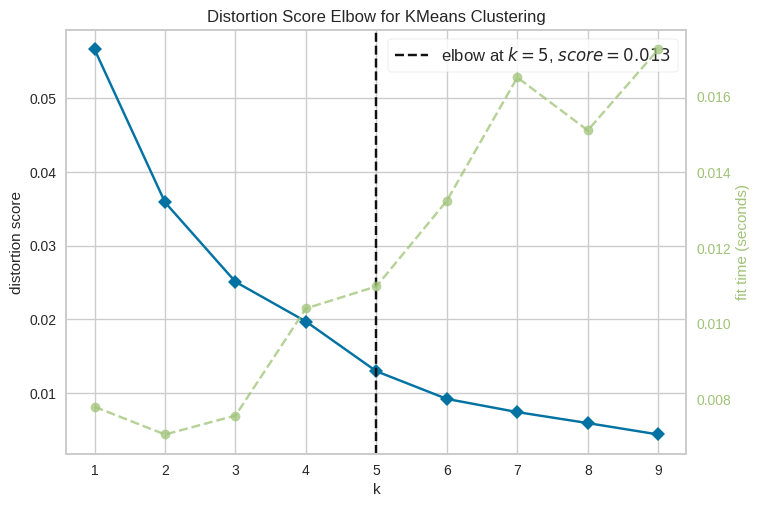

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

# Instantiate the clustering model and visualizer
km = KMeans(n_init=10, init="k-means++",max_iter=1000)
visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(latLongDf)        # Fit the data to the visualizer
visualizer.show()

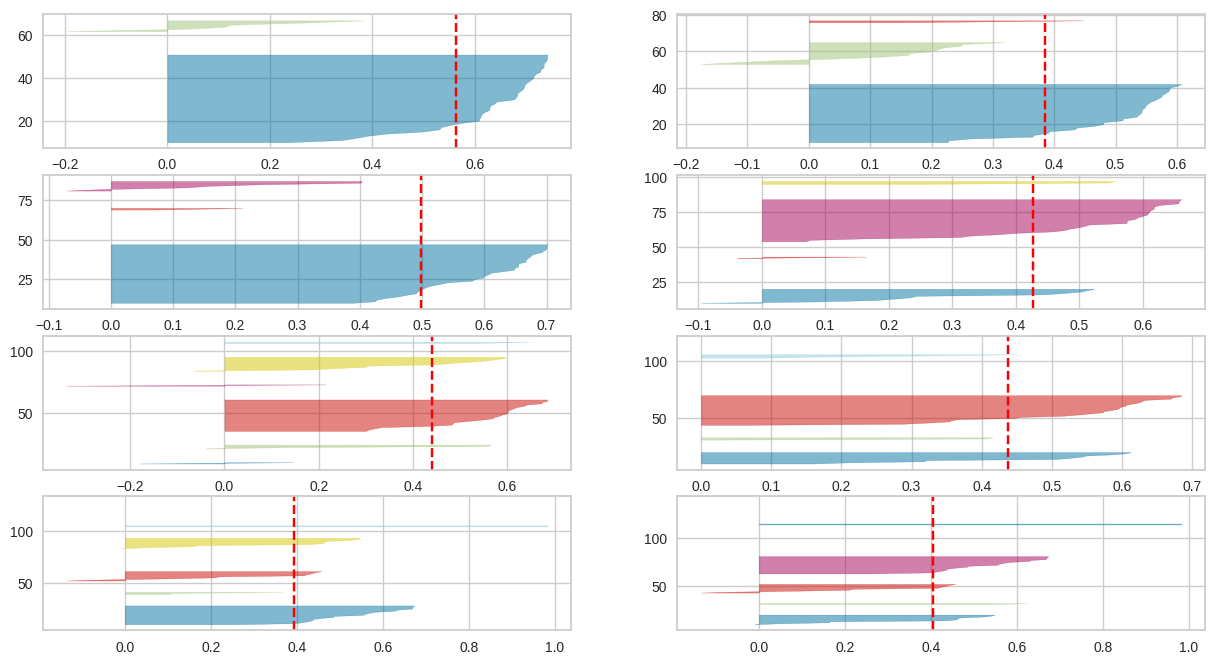

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in range(2,10):
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10,init="k-means++", max_iter=1000)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(latLongDf)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


InterclusterDistance(ax=<Axes: >,
                     estimator=KMeans(max_iter=1000, n_clusters=7, n_init=10))

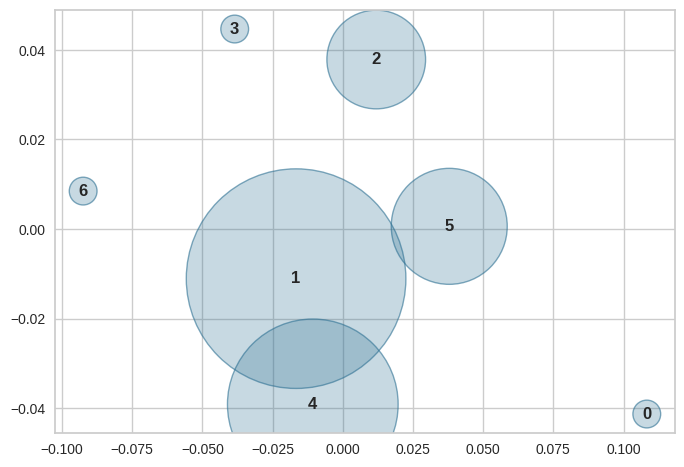

In [ ]:
#no of clusters = 7
kmeans = KMeans(n_clusters=7, n_init=10,init="k-means++", max_iter=1000)

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans)

visualizer.fit(latLongDf)

[[23.169448   80.01246   ]
 [23.16690874 79.93253405]
 [23.128016   79.807768  ]
 [23.18532991 79.91730409]
 [23.1523165  79.9404795 ]
 [23.110009   79.94229433]
 [23.13575633 79.88704967]]


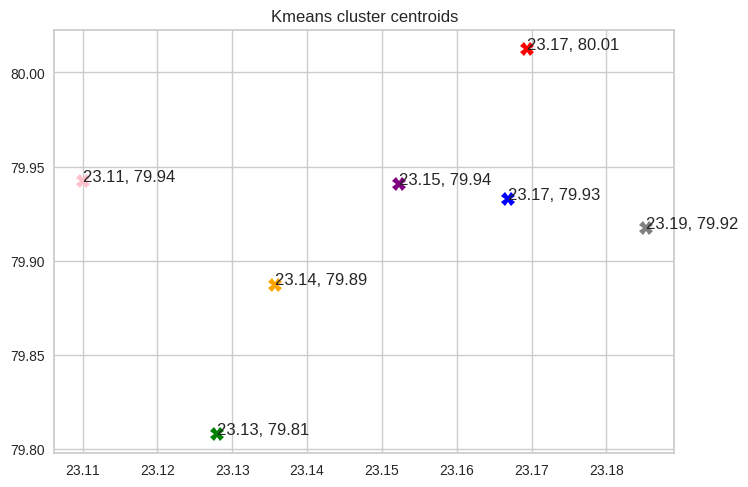

In [ ]:
kmeans.fit(latLongDf)
colors = ['red','blue','green','gray','purple','pink','orange']
colors_for_markers = ['red','darkblue','lightgreen','gray','purple','pink','orange']
centroids = kmeans.cluster_centers_
print(centroids)
for n in range(len(centroids)):
  plt.plot(centroids[n][0], centroids[n][1], marker='X', color=colors[n], markersize=10)
  plt.annotate(f'{round(float(centroids[n][0]),2)}, {round(float(centroids[n][1]),2)}',xy=(centroids[n][0],centroids[n][1]))
plt.title('Kmeans cluster centroids')
plt.show()

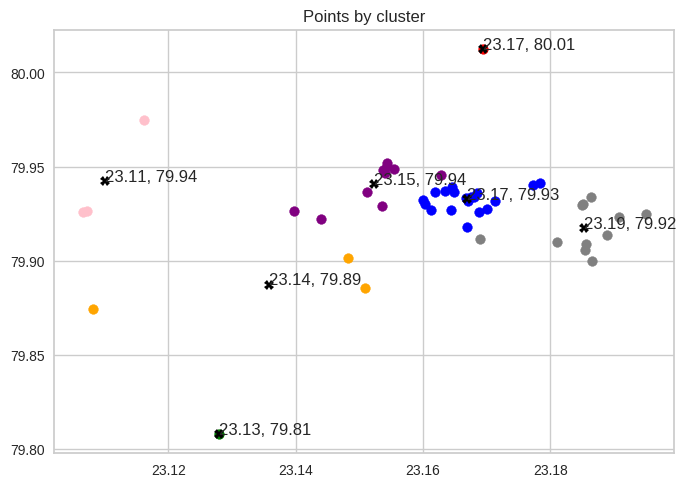

In [ ]:
z = kmeans.predict(latLongDf)
scatter_colors = []
for n in range(len(latLongDf)):
  scatter_colors.append(colors[z[n]])

for n in range(len(latLongDf)):
    # Filter latLongDf points to plot each in turn.
    ys = income
    xs = cook

    plt.scatter(latitudes[n], longitudes[n], color=scatter_colors[n])
for n in range(len(centroids)):
  plt.plot(centroids[n][0], centroids[n][1], marker='X', color="black", markersize=7)
  plt.annotate(f'{round(float(centroids[n][0]),2)}, {round(float(centroids[n][1]),2)}',xy=(centroids[n][0],centroids[n][1]))

plt.title("Points by cluster")
plt.show()

In [ ]:
df_maps_data = df_maps_data.assign(cluster=z)
centroids_list = []
# for i in range(len(df_maps_data)):
#   centroids_list.append(centroids[z[i])
df_maps_data = df_maps_data.assign(centroids=z)

x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "location.formatted_address"
marker = "centroids"
data = df_maps_data.copy()
lst_elements = sorted(list(df_maps_data[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = scatter_colors
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=[latitude,longitude], tiles="cartodbpositron",zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(location=[row["geocodes.main.latitude"],row["geocodes.main.longitude"]], color=row["color"], fill=True,popup=row[popup],radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(df_maps_data[marker].unique()))
data[data[marker]==1].apply(lambda row: folium.Marker(location=[latitude,longitude], draggable=False,  popup=row[popup] ,icon=folium.Icon(color="black")).add_to(map_), axis=1)

for x in range(len(centroids)):
  data[data[marker]==1].apply(lambda row: folium.Marker(location=[centroids[x][0],centroids[x][1]], draggable=False,  popup=row[popup] ,icon=folium.Icon(color=colors[x])).add_to(map_), axis=1)
## plot the map
map_